In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt 
import numpy as np
import keras 

In [7]:
#uploading dataset
nums_mnist = tf.keras.datasets.mnist
(training_images, training_labels),(test_images, test_labels)=nums_mnist.load_data()

Label:4


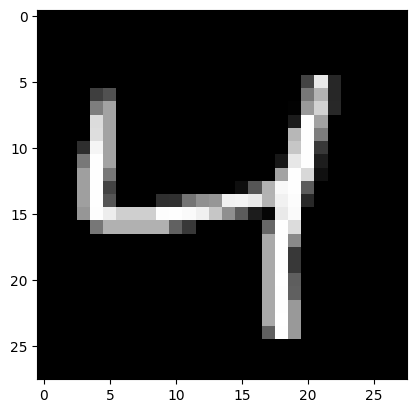

10000


In [16]:
#visualizing the database
sample=2
print(f'Label:{training_labels[sample]}')
image = training_images[sample]

fig = plt.figure
plt.imshow(image,cmap='gray')
plt.show()


In [9]:
#normalizing pixel value
train_images = training_images/255.0
train_labels = training_labels/255.0

#create a model for training 
model = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(1000,activation=tf.nn.relu),
    keras.layers.Dense(10,activation=tf.nn.softmax)
])

In [50]:
#callbacks funtion 
class myCallbacks(keras.callbacks.Callback):
    def on_epoch_end(self, epochs, logs={}):
        lim=0.98
        if logs.get('accuracy')>=lim:
            print('training_stop')
            self.model.stop_training = True
            
callbacks = myCallbacks()

In [51]:
#compile
model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(training_images,training_labels,epochs=10, callbacks=[callbacks])

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 4.3673 - accuracy: 0.9467
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.8047 - accuracy: 0.9595
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.0754 - accuracy: 0.9648
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5724 - accuracy: 0.9693
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.2348 - accuracy: 0.9717
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9324 - accuracy: 0.9728
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8348 - accuracy: 0.9739
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7114 - accuracy: 0.9746
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5676 - accuracy: 0.9750
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.452

In [52]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 1.2096 - accuracy: 0.9606


[1.2095686197280884, 0.9606000185012817]

313/313 [==============================] - 1s 2ms/step
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 
label:4


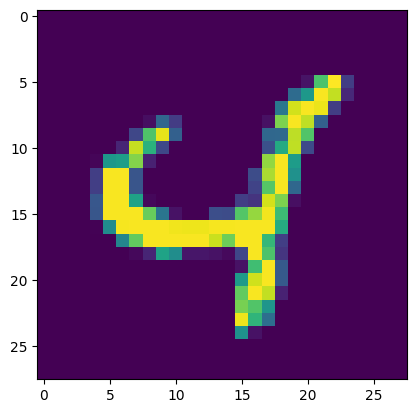

In [58]:
classification = model.predict(test_images)
index = np.random.randint(1000)
print(np.round(classification[index]))
print(' ')
plt.imshow(test_images[index])
print(f'label:{test_labels[index]}')

